In [1]:
import emcee
import corner
import sys
import vplot as vpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)
import trappist1 as t1
from scipy.stats import norm
from scipy.stats import uniform

/astro/users/jbirky/packages/vplot/vplot/__init__.py:24: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  'vplot.mplstyle'))
/epyc/opt/anaconda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/astro/users/jbirky/packages/vplot/vplot/quickplot.py:16: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  os.path.abspath(__file__)), 'vplot.mplstyle'))
/epyc/opt/anaconda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


In [2]:
samples = np.load('updated_results/trappist_posterior_samples_updated.npy')
fleming = np.load('fleming_results/trappist_posterior_samples_fleming.npy')

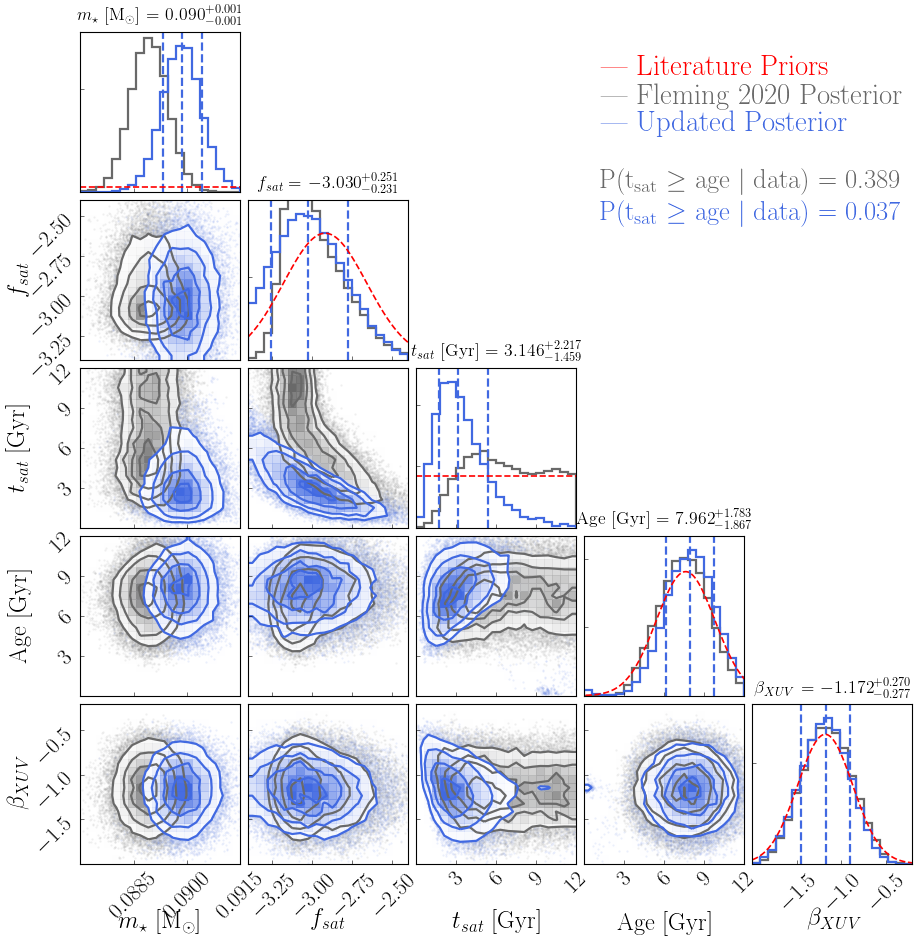

In [4]:
lw = 1.5
colors = ["dimgrey", "royalblue", "r"]
rng = np.array([[.087, .0915], [-3.4, -2.4], [0, 12], [0, 12], [-2, -0.2]])
labels = [r"$m_{\star}$ [M$_{\odot}$]", r"$f_{sat}$",
          r"$t_{sat}$ [Gyr]", r"Age [Gyr]", r"$\beta_{XUV}$"]

fig = corner.corner(fleming,  labels=labels, range=rng,
                    show_titles=True, verbose=False, max_n_ticks=4,
                    plot_contours=True, plot_datapoints=True, plot_density=True,
                    color=colors[0], no_fill_contours=False, title_kwargs={"fontsize": 16},
                    label_kwargs={"fontsize": 22}, hist_kwargs={"linewidth":2.0, "density":True})

fig = corner.corner(samples, labels=labels, range=rng, quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, verbose=False, max_n_ticks=4, title_fmt='.3f',
                    plot_contours=True, plot_datapoints=True, plot_density=True,
                    color=colors[1], no_fill_contours=False, title_kwargs={"fontsize": 16},
                    label_kwargs={"fontsize": 22}, hist_kwargs={"linewidth":2.0, "density":True},
                    fig=fig)

fig.axes[1].text(2.2, 0.725, r"--- Literature Priors", fontsize=26, color=colors[2], ha='left')
fig.axes[1].text(2.2, 0.55, r"--- Fleming 2020 Posterior", fontsize=26, color=colors[0], ha='left')
fig.axes[1].text(2.2, 0.375, r"--- Updated Posterior", fontsize=26, color=colors[1], ha='left')

mask = fleming[:,2] >= fleming[:,3]
fig.axes[1].text(2.2, 0.0, r"P(t$_{\rm sat}$ $\geq$ age $\vert$ data) = %0.3lf" % np.mean(mask), fontsize=24, color=colors[0], ha='left')
mask = samples[:,2] >= samples[:,3]
fig.axes[1].text(2.2, -0.2, r"P(t$_{\rm sat}$ $\geq$ age $\vert$ data) = %0.3lf" % np.mean(mask), fontsize=24, color=colors[1], ha='left')

ax_list = fig.axes

# mass prior
ax_list[0].axhline(1/(.11 - .07), lw=lw, color=colors[2], linestyle='--')

# fsat prior
x = np.linspace(-3.4, -2.2, 100)
ax_list[6].plot(x, norm.pdf(x, loc=t1.fsatTrappist1, scale=t1.fsatTrappist1Sig),
                lw=lw, color=colors[2], linestyle='--')

# tsat prior
ax_list[12].axhline(0.084, lw=lw, color=colors[2], linestyle='--')

# age prior
x = np.linspace(0.1, 12, 100)
ax_list[18].plot(x, norm.pdf(x, loc=t1.ageTrappist1, scale=t1.ageTrappist1Sig),
                 lw=lw, color=colors[2], linestyle='--')

# beta prior
x = np.linspace(-2, 0, 100)
ax_list[24].plot(x, norm.pdf(x, loc=t1.betaTrappist1, scale=t1.betaTrappist1Sig),
                 lw=lw, color=colors[2], linestyle='--')

# plt.savefig('plots/' + update_run.split('/results')[0] + '.png')
fig.show()